# 실루엣 분석 (Silhouette Analysis)
실루엣 분석은 클러스터링(군집화) 알고리즘의 성능을 평가하고, 데이터 포인트들이 각자 속한 클러스터에 얼마나 잘 속해 있는지, 그리고 다른 클러스터와는 얼마나 잘 분리되어 있는지를 측정하는 방법입니다. 즉, 클러스터 내의 ```응집도(cohesion)```와 클러스터 간의 ```분리도(separation)```를 동시에 고려하여 클러스터링의 품질을 정량적으로 평가합니다. 실루엣 분석은 특히 최적의 클러스터 개수(k)를 결정하는 데 유용하게 사용됩니다.

* a(i) 계산 (클러스터 내 평균 거리 - 응집도 측정): 데이터 포인트 i와 동일한 클러스터 내에 있는 다른 모든 데이터 포인트들 간의 평균 거리를 계산
* b(i) 계산 (가장 가까운 다른 클러스터까지의 평균 거리 - 분리도 측정): 데이터 포인트 i와 가장 가까운 이웃 클러스터의 모든 데이터 포인트들 간의 평균 거리를 계산
* s(i) = (b(i) - a(i)) / max(a(i), b(i))

```
s(i) ≈ +1: 데이터 포인트 i가 자신의 클러스터에 매우 잘 속해 있으며, 다른 클러스터와는 매우 잘 분리되어 있음을 의미합니다. 이상적인 경우입니다.
s(i) ≈ 0: 데이터 포인트 i가 두 클러스터 간의 경계에 매우 가깝게 위치함을 의미합니다. 이는 해당 데이터 포인트가 다른 클러스터에 속할 수도 있었음을 시사합니다.
s(i) ≈ -1: 데이터 포인트 i가 잘못된 클러스터에 할당되었을 가능성이 높음을 의미합니다. 즉, 자신이 속한 클러스터보다 다른 클러스터에 더 가깝다는 뜻입니다.
```

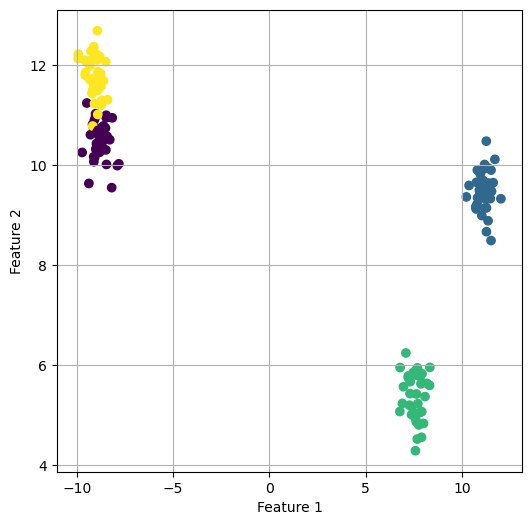

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

X, Y = make_blobs(n_samples=150,
                       centers=4,
                       cluster_std=0.4,
                       center_box=(-15.0, 15.0))

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

In [2]:
X

array([[11.33990407,  8.88637533],
       [ 8.3050474 ,  5.59392278],
       [-9.11750981, 11.73395335],
       [10.79833781,  9.34588046],
       [-9.21618946, 12.09871743],
       [11.40429154,  9.56428953],
       [-8.46721249, 10.99520554],
       [10.73878741,  9.65603439],
       [-9.26482301, 12.27764719],
       [-8.48886628, 10.30268596],
       [-9.31573277, 11.98142412],
       [-9.17913275, 10.81303927],
       [-8.97699219, 10.71829191],
       [11.49453145,  8.49013621],
       [-8.91846686, 11.50448854],
       [-9.06846537, 10.15500086],
       [-8.15751238, 10.94392309],
       [11.34667204,  9.94129794],
       [ 8.31703154,  5.95442813],
       [11.4624412 ,  9.48635709],
       [ 7.0772629 ,  6.24225887],
       [ 7.94182245,  5.65024429],
       [-8.96530113, 12.21146996],
       [-9.92655456, 12.12569098],
       [-8.76165808, 11.82487172],
       [-8.71327636, 10.38631389],
       [ 7.82219456,  5.0569253 ],
       [-9.33925965, 11.71440894],
       [-8.45836861,

In [3]:
Y

array([1, 2, 3, 1, 3, 1, 0, 1, 3, 0, 3, 0, 0, 1, 3, 0, 0, 1, 2, 1, 2, 2,
       3, 3, 3, 0, 2, 3, 0, 1, 2, 1, 2, 1, 0, 0, 1, 1, 1, 3, 1, 3, 0, 0,
       0, 3, 3, 0, 3, 3, 3, 1, 3, 2, 1, 3, 2, 0, 2, 2, 2, 0, 1, 3, 1, 2,
       0, 0, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 1, 2, 1, 3, 3, 2, 1, 1, 2, 3,
       0, 1, 0, 1, 3, 2, 2, 0, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1,
       2, 1, 2, 2, 3, 0, 3, 0, 0, 1, 0, 0, 0, 1, 3, 2, 0, 3, 3, 0, 1, 0,
       0, 3, 0, 3, 3, 0, 2, 2, 1, 3, 2, 3, 0, 2, 3, 3, 2, 3])

For n_clusters = 2, the average silhouette_score is : 0.7808
For n_clusters = 3, the average silhouette_score is : 0.7852
For n_clusters = 4, the average silhouette_score is : 0.9254
For n_clusters = 5, the average silhouette_score is : 0.7912
For n_clusters = 6, the average silhouette_score is : 0.6613


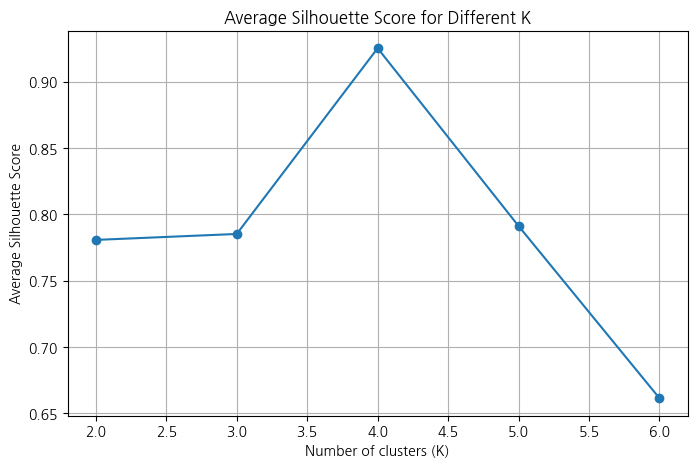

In [13]:
import koreanize_matplotlib
import warnings
warnings.filterwarnings("ignore")

# 다양한 K 값에 대해 실루엣 분석 수행
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_scores = []

for n_clusters in range_n_clusters:

    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X) # 각 데이터 포인트에 클러스터 레이블 할당

    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title('Average Silhouette Score for Different K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()